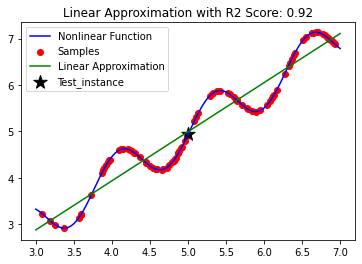

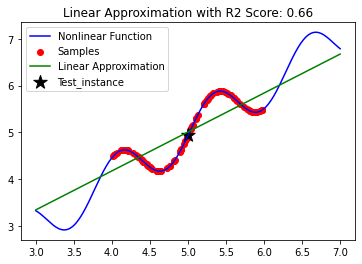

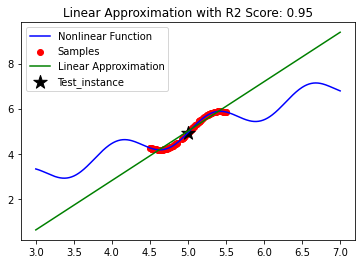

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

for A in [2, 1, 0.5]:
    # 1. 凸凹の単調増加傾向の非線形関数を定義する
    def nonlinear_func(x):
        return - x - 0.5 * np.sin(5*x)

    # 2. x = 5を中心に+-Aの範囲で100個のサンプルを一様分布でサンプリングする
    x_samples = np.random.uniform(5-A, 5+A, 100)

    # 3. 非線形関数の出力を取得する
    y_samples = nonlinear_func(x_samples)

    # 4. サンプルを用いて線形近似を行い、決定係数を求める
    x_samples_reshaped = x_samples.reshape(-1, 1)
    reg = LinearRegression().fit(x_samples_reshaped, y_samples)
    y_pred = reg.predict(x_samples_reshaped)
    r2 = r2_score(y_samples, y_pred)

    # 5. 元の非線形関数、サンプル点、線形近似のグラフを表示する
    x_range = np.linspace(3, 7, 400)
    y_true = nonlinear_func(x_range)

    plt.plot(x_range, y_true, label="Nonlinear Function", color="blue")
    plt.scatter(x_samples, y_samples, label="Samples", color="red")
    plt.plot(x_range, reg.predict(x_range.reshape(-1, 1)), label="Linear Approximation", color="green")
    plt.scatter(5, nonlinear_func(5), marker='*', s=200, color='black', label='Test_instance')
    plt.title(f"Linear Approximation with R2 Score: {r2:.2f}")
    plt.legend()
    plt.show()
